<div class="alert alert-block alert-info alert">

# <span style=" color:red">WELCOME!
    
Welcome to "Bike Demand Visualization Project" which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.</span>


<div class="alert alert-block alert-success ">

## <span style=" color:red">Determines 
    
Features
    
- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
    
"weather_code" category description:

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog
    
Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc. Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.
    
# <span style=" color:red">Tasks
</span>





<div class="alert alert-warning alert-info">
<span style=" color:red">1. Import Libraries
</span>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

<div class="alert alert-warning alert-info">
<span style=" color:red">2. Read Dataset
</span>

In [2]:
df_bike = pd.read_csv("store_sharing.csv")
df_bike.head(5)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [3]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [4]:
df_bike.describe().T # verilerin dağılımı hakkında bilgi edinip, görselleştirme fikirleri elde edinmek için istatistiksel tanım

,count,mean,std,min,25%,50%,75%,max
cnt,17414.0,1143.101642,1085.108068,0.0,257.0,844.0,1671.75,7860.0
t1,17414.0,12.468091,5.571818,-1.5,8.0,12.5,16.00,34.0
t2,17414.0,11.520836,6.615145,-6.0,6.0,12.5,16.00,34.0
hum,17414.0,72.324954,14.313186,20.5,63.0,74.5,83.00,100.0
wind_speed,17414.0,15.913063,7.894570,0.0,10.0,15.0,20.50,56.5
weather_code,17414.0,2.722752,2.341163,1.0,1.0,2.0,3.00,26.0
is_holiday,17414.0,0.022051,0.146854,0.0,0.0,0.0,0.00,1.0
is_weekend,17414.0,0.285403,0.451619,0.0,0.0,0.0,1.00,1.0
season,17414.0,1.492075,1.118911,0.0,0.0,1.0,2.00,3.0


<div class="alert alert-warning alert-info">
<span style=" color:red">3. Check missing values and if there are any dublicate rows or not.
</span>

In [5]:
missing_values = df_bike.isnull().sum() # kayıp değer yok
missing_values

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

<Axes: >

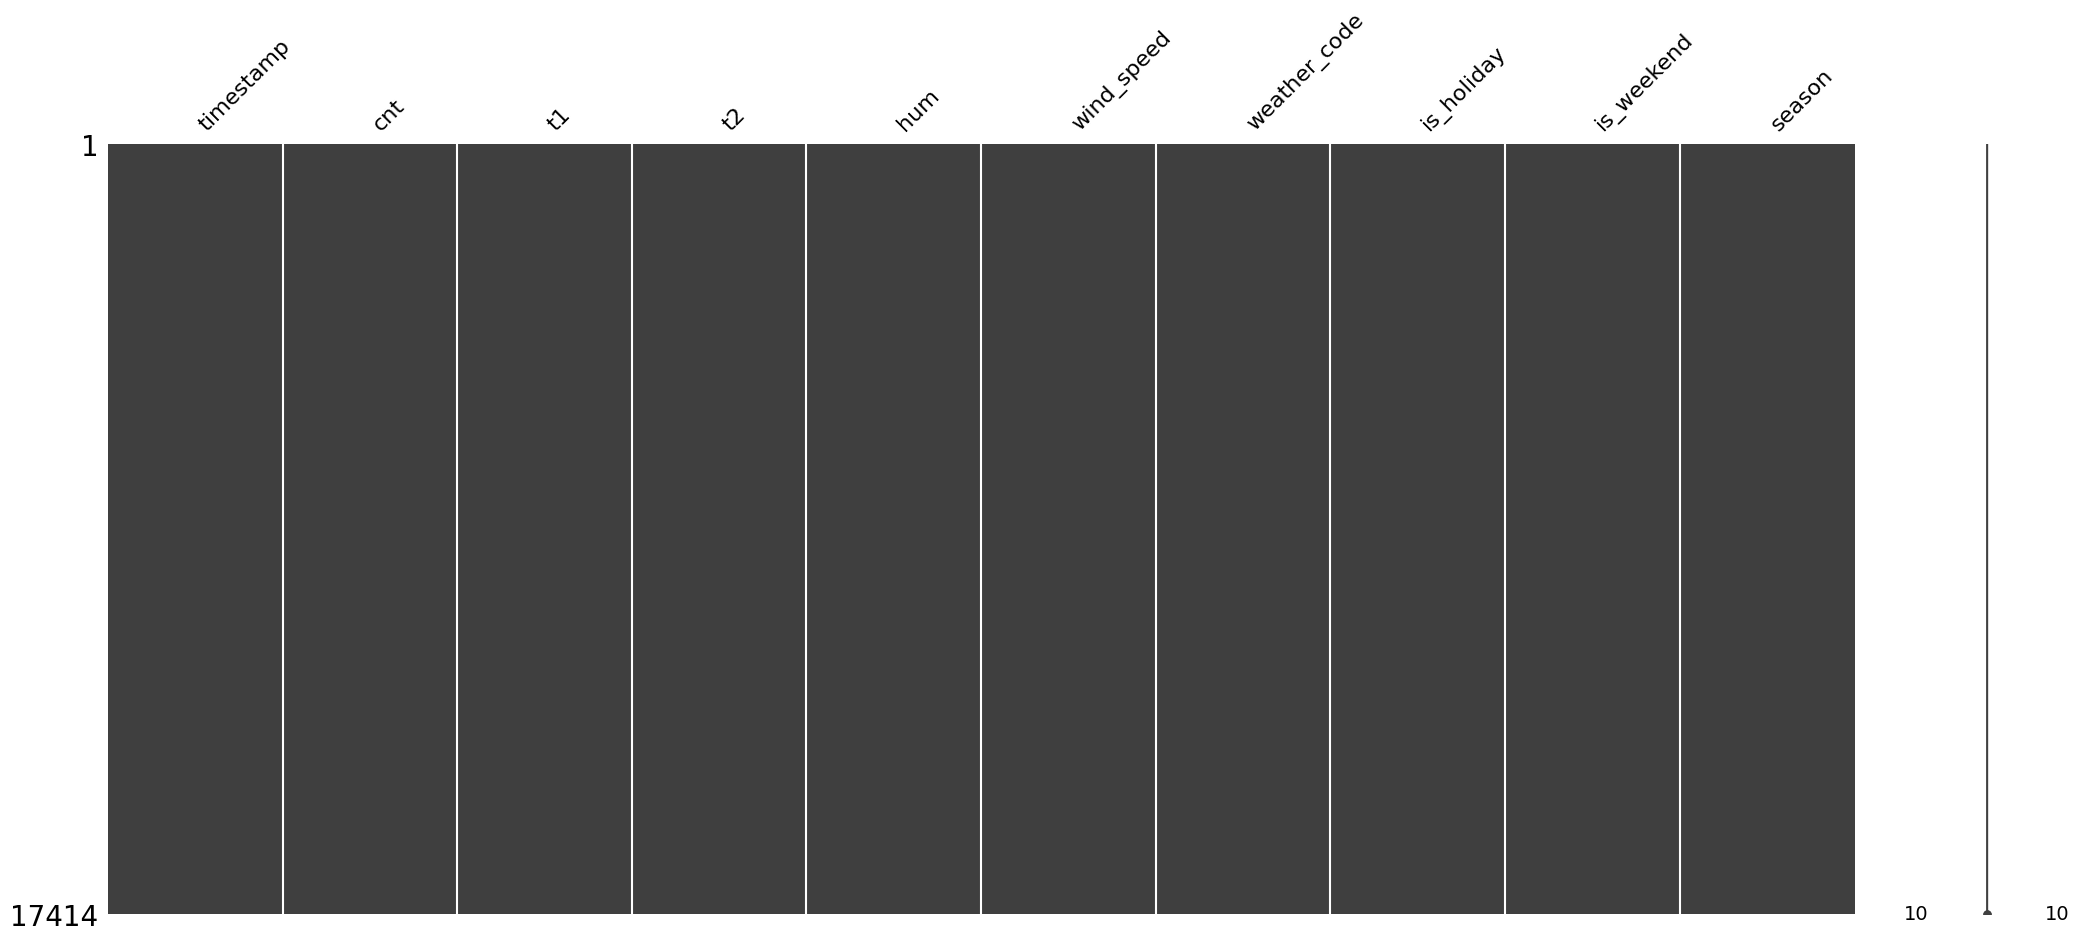

In [6]:
import missingno as msno # kayıp değer yok
msno.matrix(df_bike)

In [7]:
duplicate_rows = df_bike.duplicated() # yinelenen satır yok
duplicate_rows

0        False
1        False
2        False
3        False
4        False
         ...  
17409    False
17410    False
17411    False
17412    False
17413    False
Length: 17414, dtype: bool

ValueError: zero-size array to reduction operation minimum which has no identity

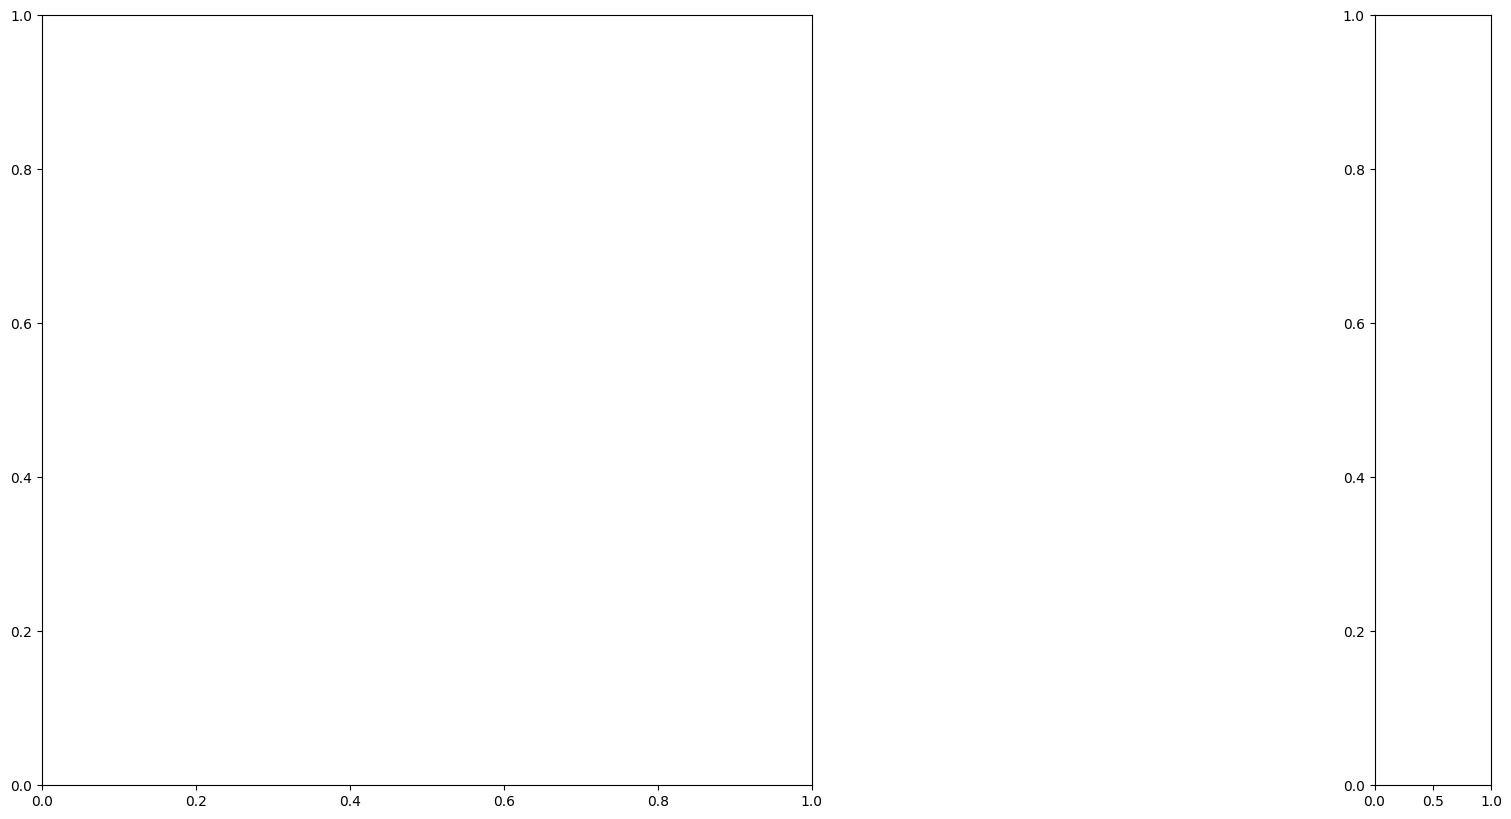

In [8]:
msno.matrix(df_bike[duplicate_rows]) # yinelenen satır yok

<div class="alert alert-warning alert-info">
<span style=" color:red">4. Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)
</span>


In [9]:
selected_columns = ['weather_code', 'is_holiday', 'is_weekend', 'season']
df_selected = df_bike[selected_columns]
df_selected.head(5)

,weather_code,is_holiday,is_weekend,season
0,3.0,0.0,1.0,3.0
1,1.0,0.0,1.0,3.0
2,1.0,0.0,1.0,3.0
3,1.0,0.0,1.0,3.0
4,1.0,0.0,1.0,3.0


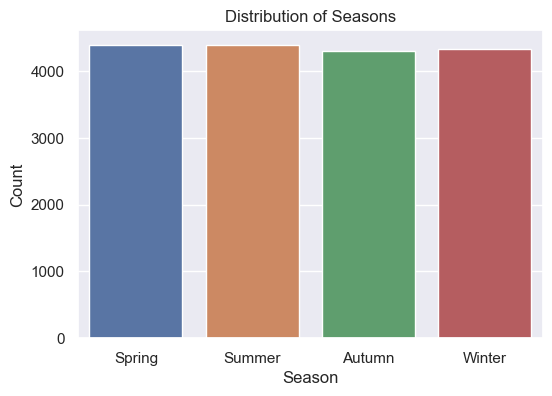

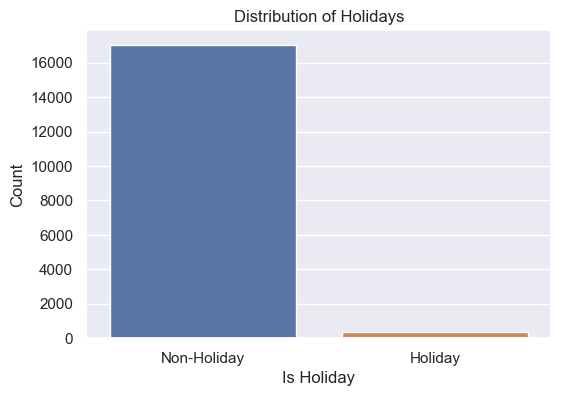

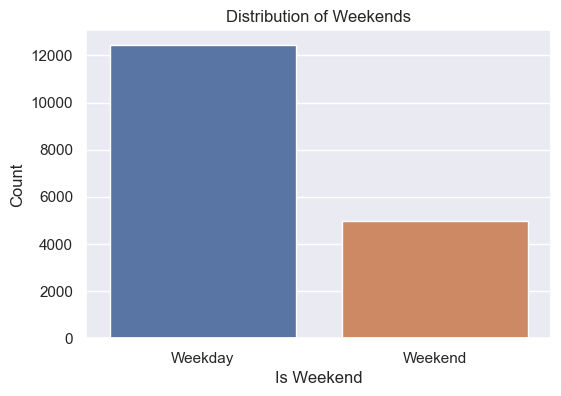

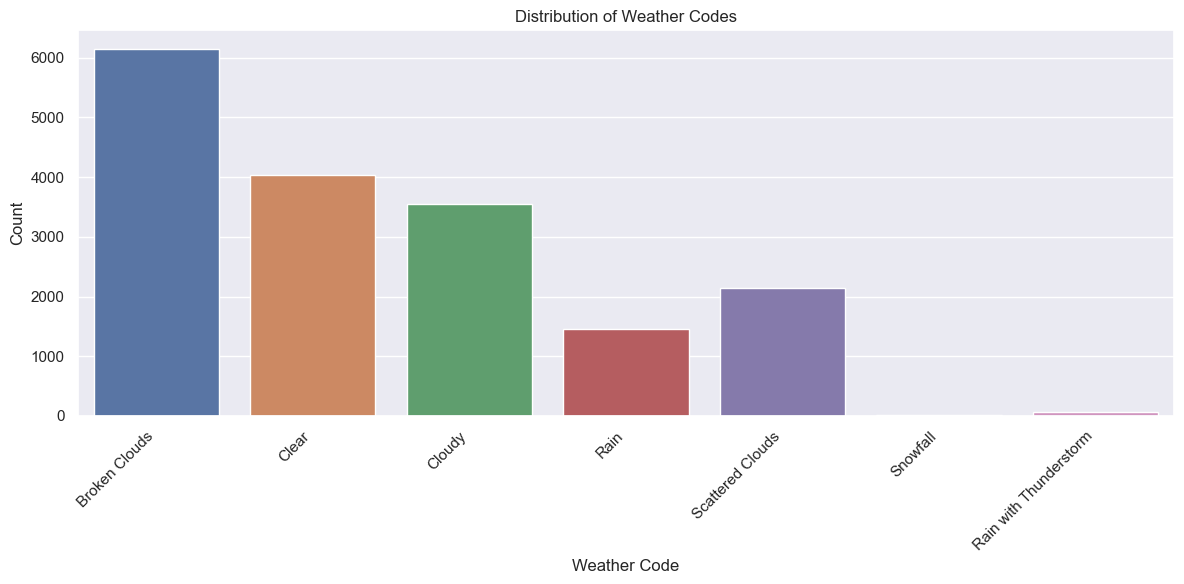

In [10]:
# Setting the plot size
sns.set(rc={'figure.figsize':(6, 4)})

# Season
sns.countplot(x='season', data=df_bike)
plt.title('Distribution of Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Autumn', 'Winter'])
plt.show()

# Is Holiday
sns.countplot(x='is_holiday', data=df_bike)
plt.title('Distribution of Holidays')
plt.xlabel('Is Holiday')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()

# Is Weekend
sns.countplot(x='is_weekend', data=df_bike)
plt.title('Distribution of Weekends')
plt.xlabel('Is Weekend')
plt.ylabel('Count')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()

# Weather Code
weather_labels = {
    1: 'Clear',
    2: 'Scattered Clouds',
    3: 'Broken Clouds',
    4: 'Cloudy',
    7: 'Rain',
    10: 'Rain with Thunderstorm',
    26: 'Snowfall',
    94: 'Freezing Fog'
}

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='weather_code', data=df_bike)
ax.set_title('Distribution of Weather Codes')
ax.set_xlabel('Weather Code')
ax.set_ylabel('Count')
ax.set_xticklabels([weather_labels[code] for code in df_bike['weather_code'].unique()], rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Axes: xlabel='weather_code', ylabel='count'>

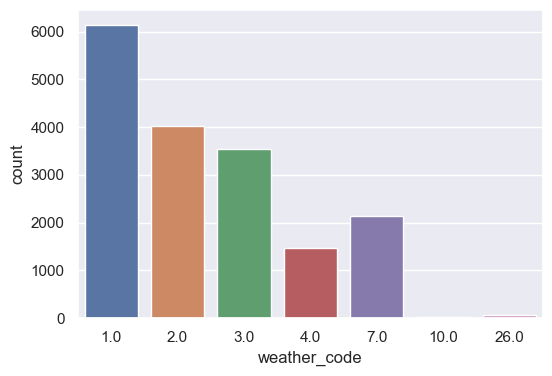

In [11]:
sns.countplot(x='weather_code',data=df_bike)

# weather_code
sns.countplot(x='weather_code',data=df)

1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
2 = scattered clouds / few clouds
3 = Broken clouds
4 = Cloudy
7 = Rain/ light Rain shower/ Light rain
10 = rain with thunderstorm
26 = snowfall
94 = Freezing Fog

<Axes: xlabel='weather_code', ylabel='count'>

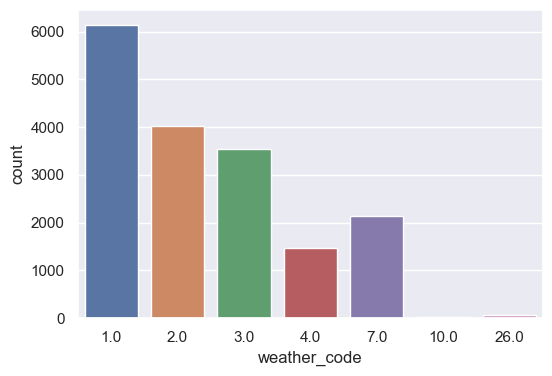

In [32]:
sns.countplot(x='weather_code',data=df_bike)

<div class="alert alert-warning alert-info">
<span style=" color:red">5. Look at the data type of each variable, transform timestamp in type, and set it as index.
</span>

In [12]:
# Check the data types of each variable
print(df_bike.dtypes)

# Transform "timestamp" to datetime type
df_bike['timestamp'] = pd.to_datetime(df_bike['timestamp'])

# Set "timestamp" as the index
df_bike.set_index('timestamp', inplace=True)

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object


In [13]:
df_bike.index.name = 'timestamp'

<div class="alert alert-warning alert-info">
<span style=" color:red">6. Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)
</span>

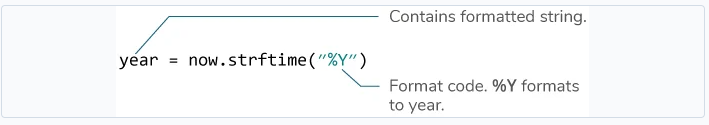

In [14]:
# Extract day of the week
df_bike['day_of_week'] = df_bike.index.dayofweek

# Extract day of the month
df_bike['day_of_month'] = df_bike.index.day

# Extract hour
df_bike['hour'] = df_bike.index.hour

# Extract month
df_bike['month'] = df_bike.index.month

# Extract season
df_bike['season'] = df_bike.index.month.map({1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'})

# Extract year
df_bike['year'] = df_bike.index.year

In [15]:
df_bike.head(5)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,day_of_week,day_of_month,hour,month,year
timestamp,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,Winter,6,4,0,1,2015
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,Winter,6,4,1,1,2015
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,Winter,6,4,2,1,2015
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,Winter,6,4,3,1,2015
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,Winter,6,4,4,1,2015


<div class="alert alert-warning alert-info">
<span style=" color:red">7. Visualize the correlation with a heatmap
</span>

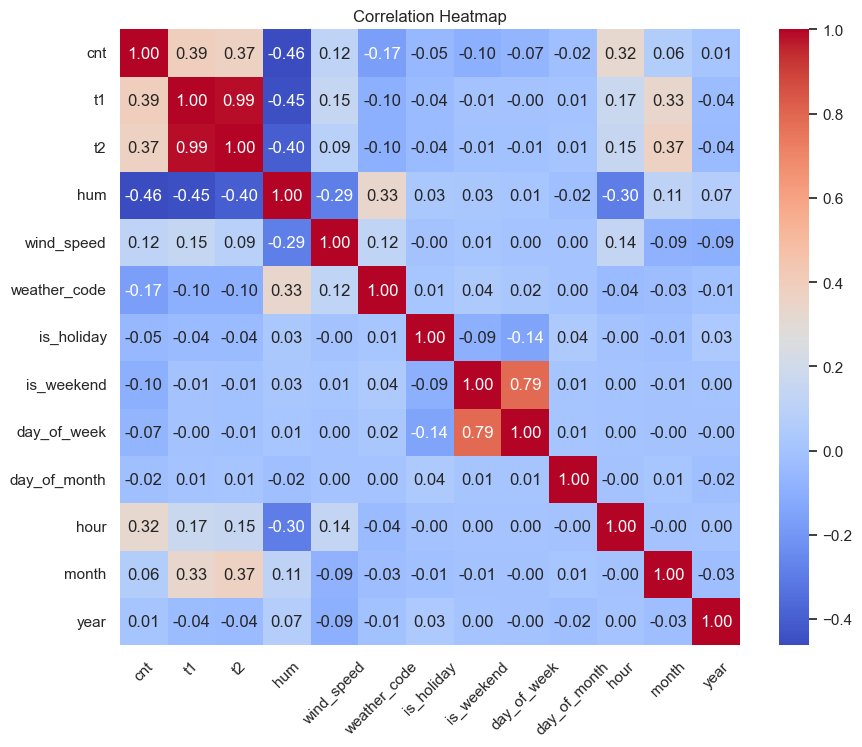

In [16]:
# Compute the correlation matrix
correlation_matrix = df_bike.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Customize the plot
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">8. Visualize the correlation of the target variable and the other features with barplot
</span>

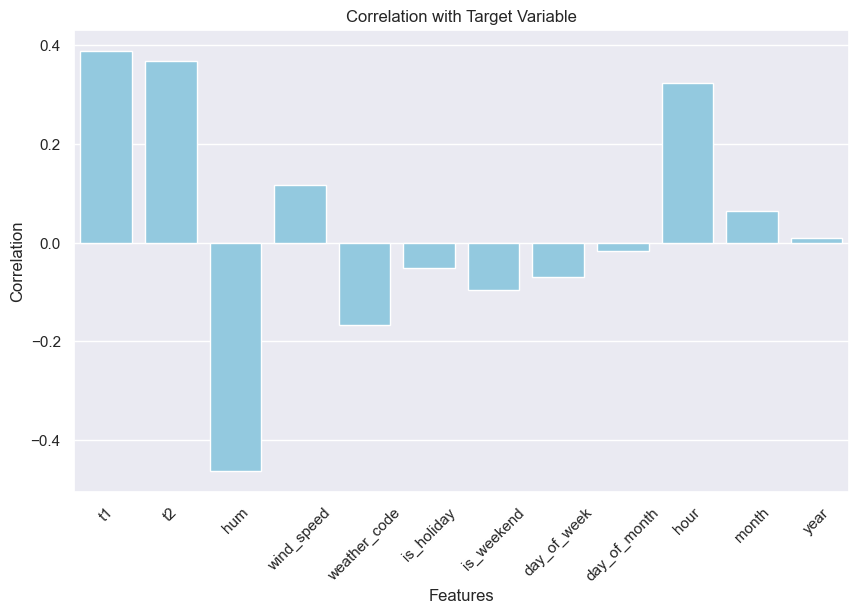

In [17]:
# Select only the numeric columns for correlation calculation
numeric_columns = df_bike.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Get the correlation values with the target variable
correlation_with_target = correlation_matrix['cnt'].drop('cnt')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, color='skyblue')

# Customize the plot
plt.title('Correlation with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()

In [18]:
# Create a date range with 3000 rows
dates = pd.date_range('3/11/2000', periods=3000, freq='D')

# Create the DataFrame with the timestamp column
df_timestamp = pd.DataFrame({'timestamp': dates})

# Convert the timestamp column to datetime
%timeit df_timestamp['timestamp'] = pd.to_datetime(df_timestamp['timestamp'], infer_datetime_format=True)

# Output:
# 100 loops, best of 3: 10.4 ms per loop

%timeit df_timestamp['timestamp'] = pd.to_datetime(df_timestamp['timestamp'], infer_datetime_format=False)

# Output:
# 1 loop, best of 3: 471 ms per loop

1.7 ms ± 31.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.77 ms ± 80.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


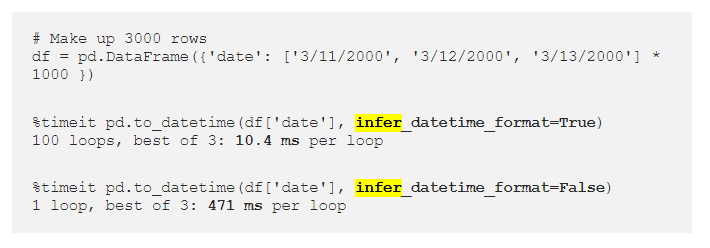

<div class="alert alert-warning alert-info">
<span style=" color:red">9. Plot bike shares over time use lineplot.
</span>

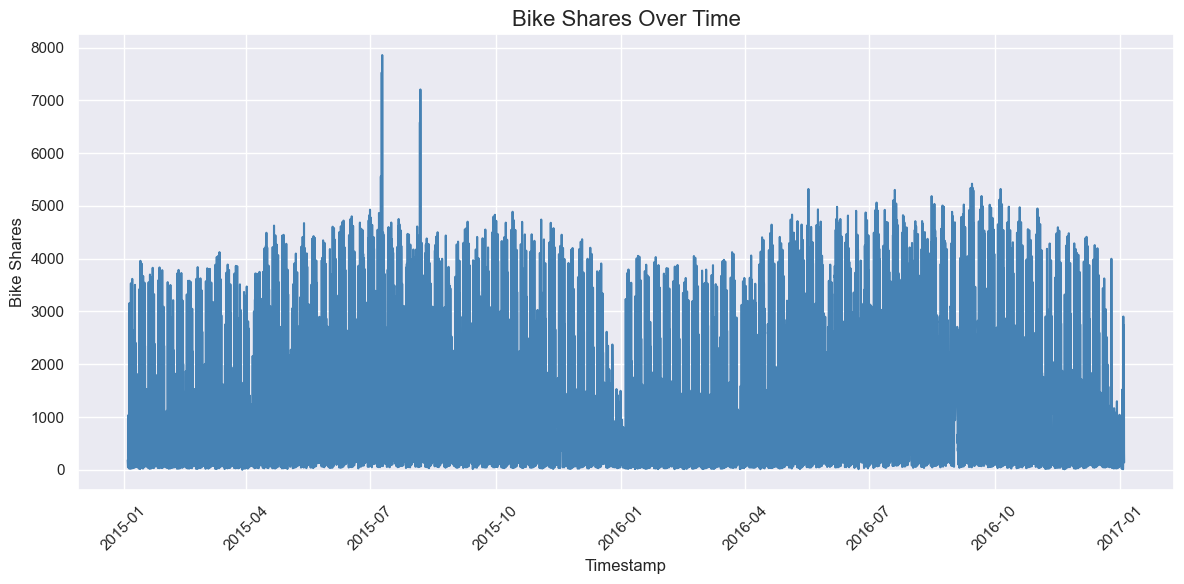

In [19]:
# Set the figure size and font size
plt.figure(figsize=(12, 6))
plt.rcParams['font.size'] = 12

# Plot the bike shares over time
sns.lineplot(data=df_bike, x='timestamp', y='cnt', color='steelblue')

# Set the title and axis labels
plt.title('Bike Shares Over Time', fontsize=16)
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Bike Shares', fontsize=12)

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">10. Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot).
</span>

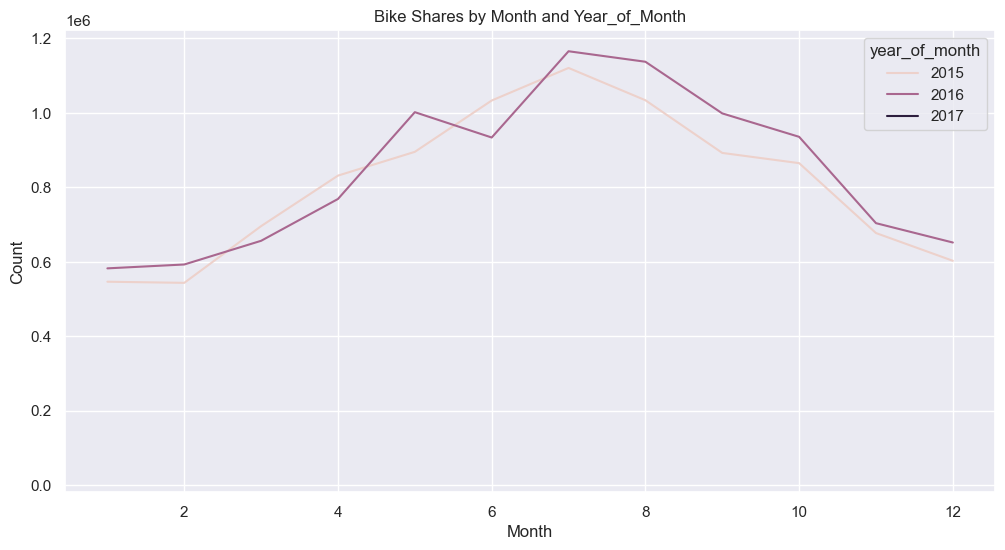

In [20]:
# Extract month and year_of_month
df_bike['month'] = df_bike.index.month
df_bike['year_of_month'] = df_bike.year

# Calculate the total bike shares per month and year_of_month
df_monthly = df_bike.groupby(['month', 'year_of_month'])['cnt'].sum().reset_index()

# Create line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='cnt', hue='year_of_month', data=df_monthly)
plt.title('Bike Shares by Month and Year_of_Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

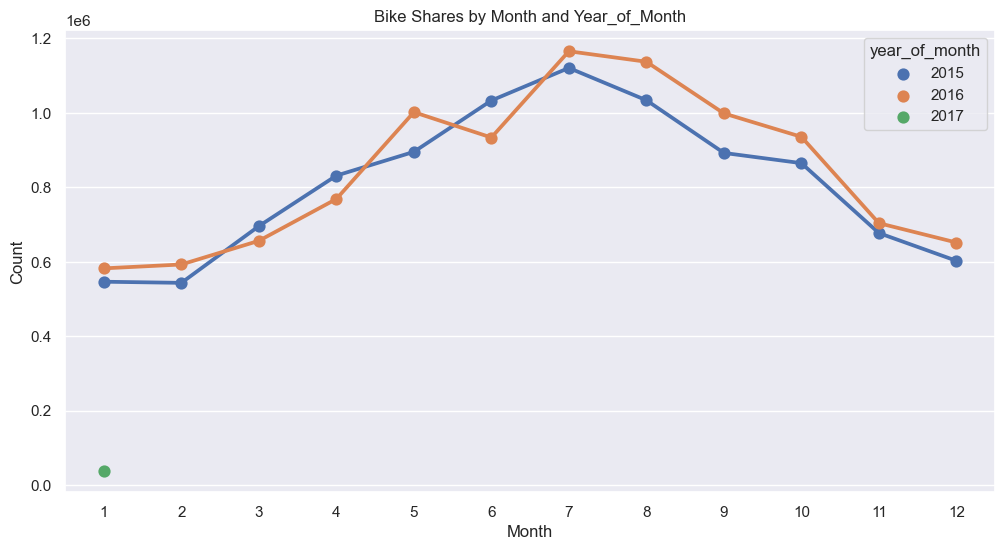

In [21]:
plt.figure(figsize=(12, 6))
sns.pointplot(x='month', y='cnt', hue='year_of_month', data=df_monthly)
plt.title('Bike Shares by Month and Year_of_Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

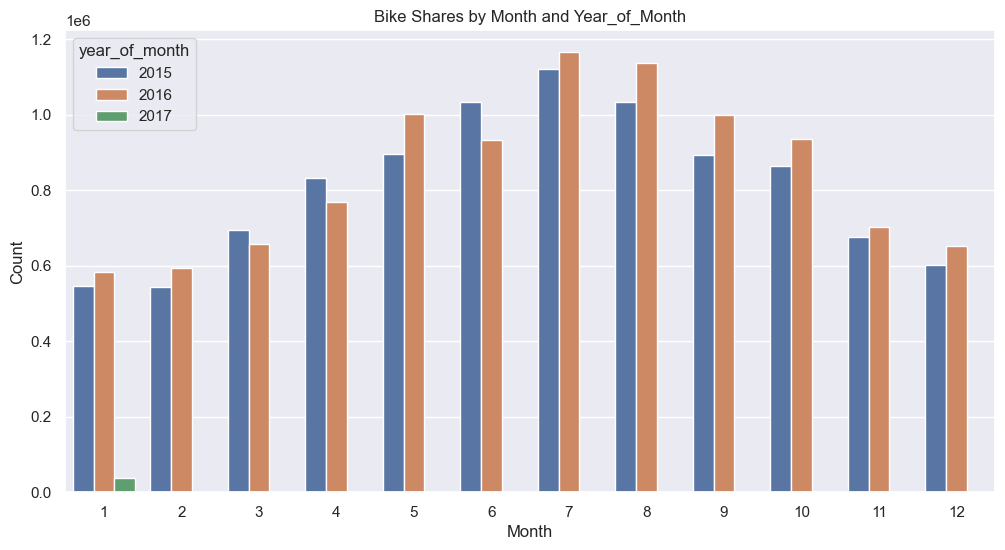

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='cnt', hue='year_of_month', data=df_monthly)
plt.title('Bike Shares by Month and Year_of_Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">11. Plot bike shares by hours on (holidays, weekend, season).
</span>

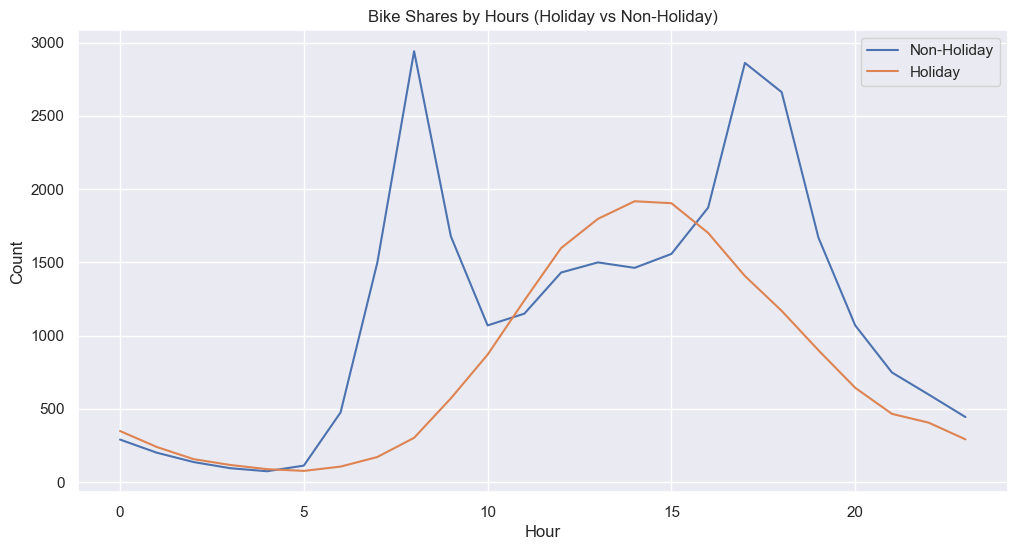

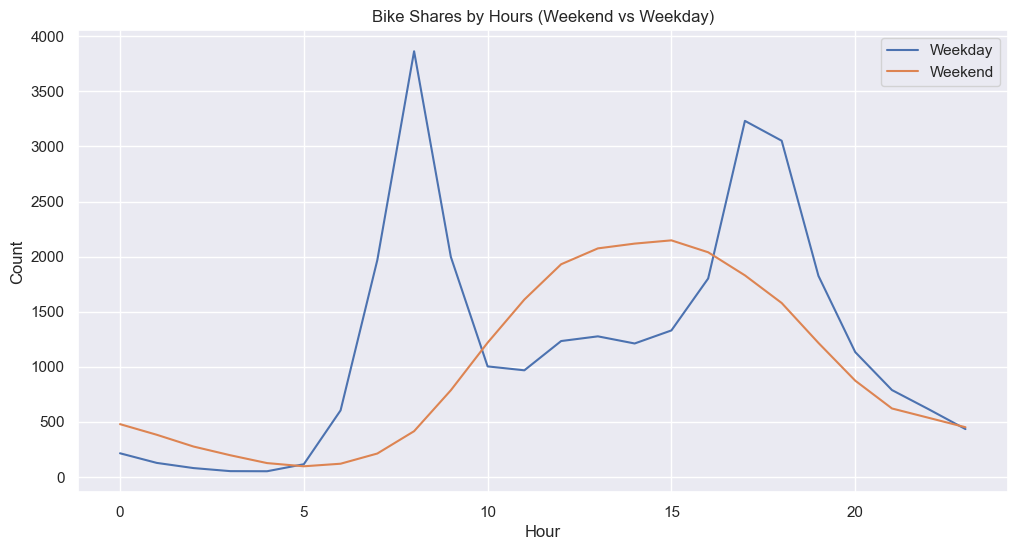

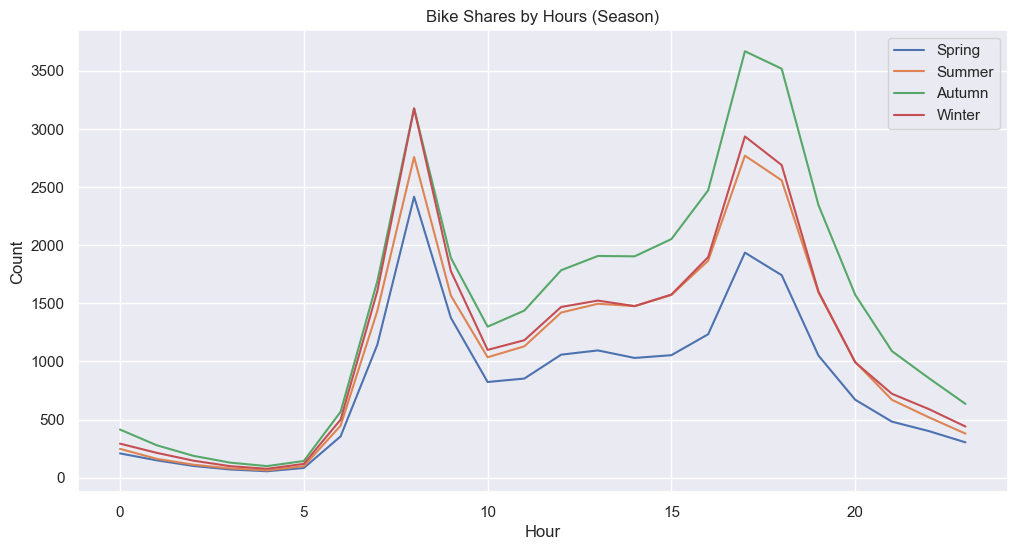

In [23]:
# Plot bike shares by hours on (holidays, weekend, season)
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='cnt', data=df_bike, hue='is_holiday', err_style=None)
plt.title('Bike Shares by Hours (Holiday vs Non-Holiday)')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend(['Non-Holiday', 'Holiday'])
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='cnt', data=df_bike, hue='is_weekend', err_style=None)
plt.title('Bike Shares by Hours (Weekend vs Weekday)')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend(['Weekday', 'Weekend'])
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='cnt', data=df_bike, hue='season', err_style=None)
plt.title('Bike Shares by Hours (Season)')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend(['Spring', 'Summer', 'Autumn', 'Winter'])
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red"> 12. Plot bike shares by day of week.

- You may want to see whether it is a holiday or not
</span>

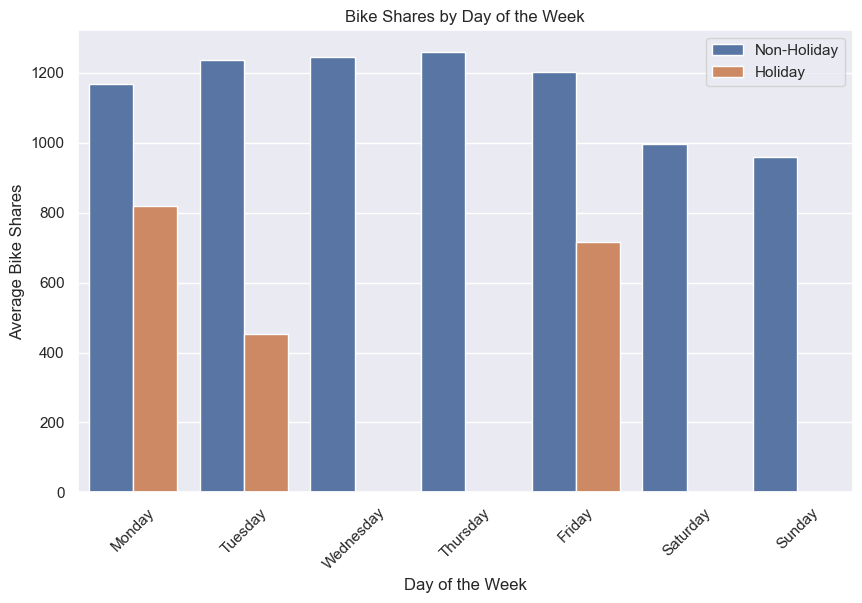

In [62]:
# Group the data by day of the week and holiday status, and calculate the average bike shares
grouped = df_bike.groupby(['day_of_week', 'is_holiday'], as_index=False)['cnt'].mean()

# Map the day of the week labels
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=grouped, x='day_of_week', y='cnt', hue='is_holiday')
plt.title('Bike Shares by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Bike Shares')
plt.xticks(range(7), day_labels, rotation=45)

# Set the legend labels
legend_labels = ['Non-Holiday', 'Holiday']
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, legend_labels)

plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red"> 13. Plot bike shares by day of month
</span>

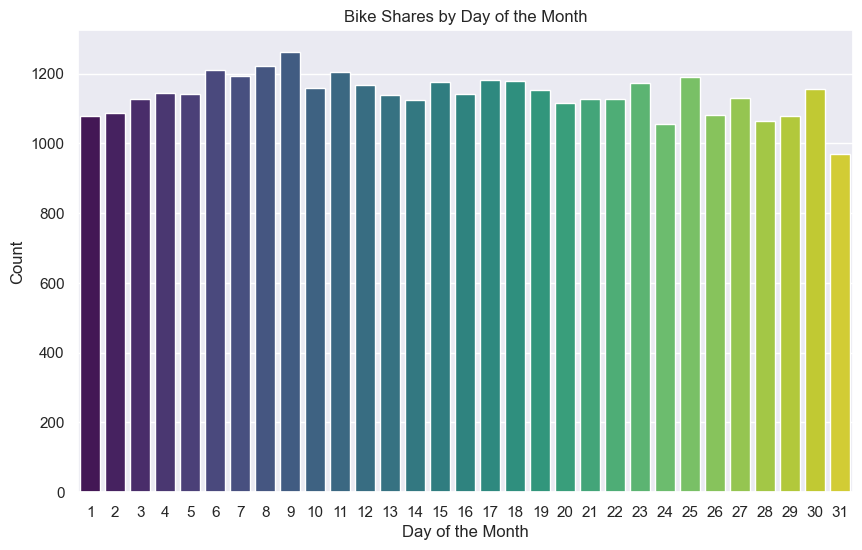

In [26]:
# Group the data by day of the month
grouped = df_bike.groupby('day_of_month', as_index=False)['cnt'].mean()

# Plot bike shares by day of the month
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='day_of_month', y='cnt', palette='viridis')
plt.title('Bike Shares by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Count')

plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red"> 14. Plot bike shares by year

- Plot bike shares on holidays by seasons
</span>

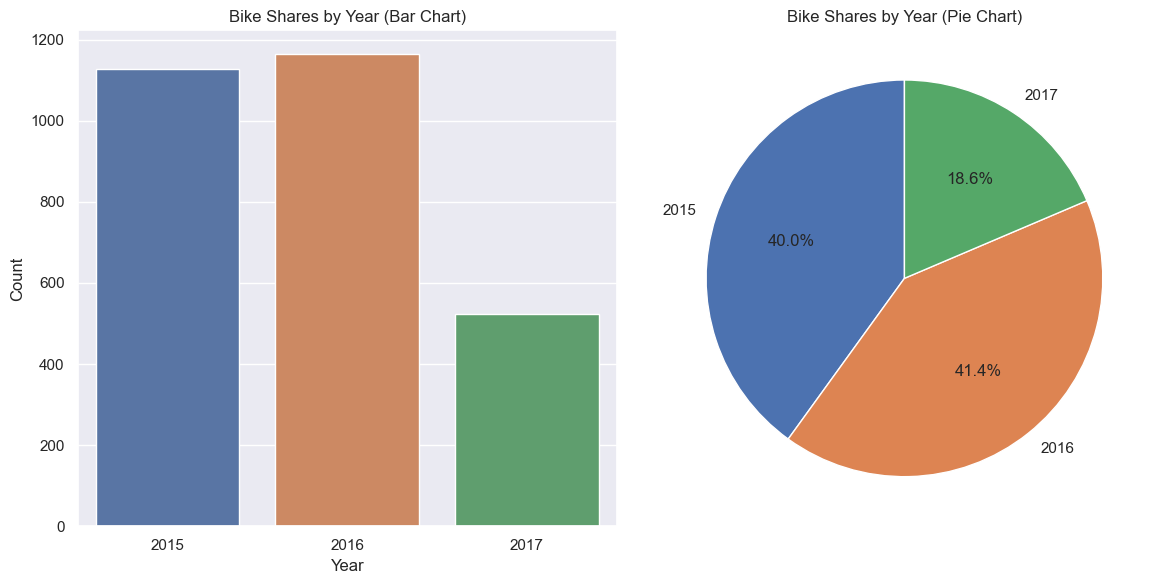

In [27]:
# Group the data by year
grouped = df_bike.groupby('year', as_index=False)['cnt'].mean()

# Calculate the total bike shares for each year
total_shares = grouped['cnt'].sum()

# Calculate the percentage of bike shares for each year
grouped['percentage'] = grouped['cnt'] / total_shares * 100

# Plot bike shares by year using Bar Chart
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Subplot for Bar Chart
sns.barplot(data=grouped, x='year', y='cnt')
plt.title('Bike Shares by Year (Bar Chart)')
plt.xlabel('Year')
plt.ylabel('Count')

# Plot bike shares by year using Pie Chart
plt.subplot(1, 2, 2)  # Subplot for Pie Chart
plt.pie(grouped['percentage'], labels=grouped['year'], autopct='%1.1f%%', startangle=90)
plt.title('Bike Shares by Year (Pie Chart)')

plt.tight_layout()
plt.show()

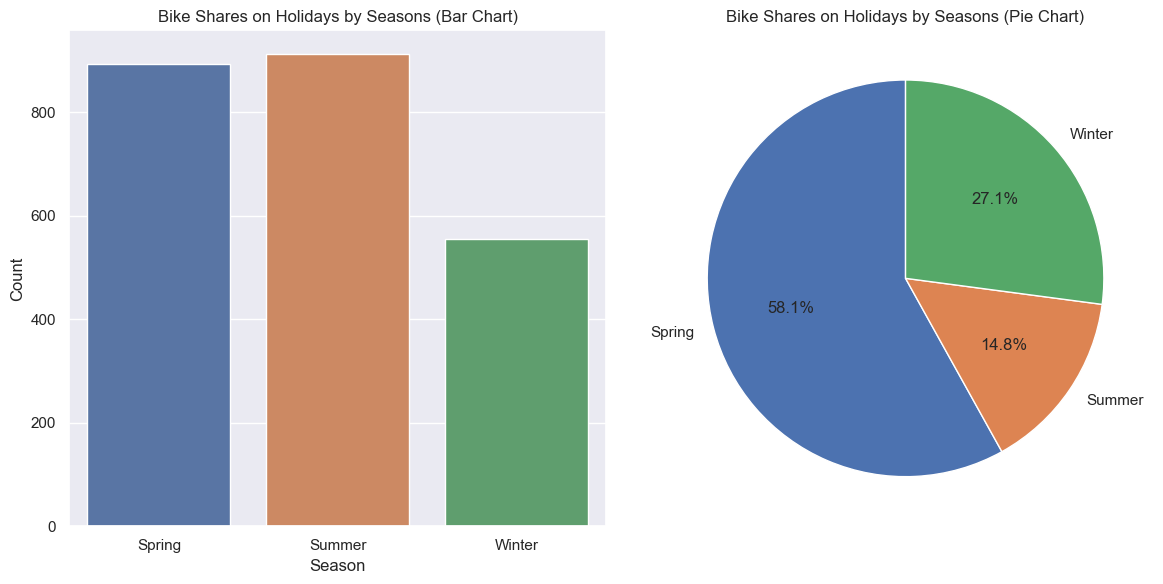

In [28]:
# Filter the data for holidays
holidays_data = df_bike[df_bike['is_holiday'] == 1]

# Group the data by season
grouped = holidays_data.groupby('season', as_index=False)['cnt'].mean()

# Plot bike shares on holidays by seasons using Bar Chart
plt.figure(figsize=(12, 6))

# Bar Chart
plt.subplot(1, 2, 1)
sns.barplot(data=grouped, x='season', y='cnt')
plt.title('Bike Shares on Holidays by Seasons (Bar Chart)')
plt.xlabel('Season')
plt.ylabel('Count')

# Filter the data for holidays
holidays_data = df_bike[df_bike['is_holiday'] == 1]

# Group the data by season
grouped = holidays_data.groupby('season', as_index=False)['cnt'].sum()

# Plot bike shares on holidays by seasons using Pie Chart
plt.subplot(1, 2, 2)

# Pie Chart
plt.pie(grouped['cnt'], labels=grouped['season'], autopct='%1.1f%%', startangle=90)
plt.title('Bike Shares on Holidays by Seasons (Pie Chart)')

plt.tight_layout()
plt.show();

<div class="alert alert-warning alert-info">
<span style=" color:red">15. Visualize the distribution of bike shares by weekday/weekend with piechart and barplot
</span>

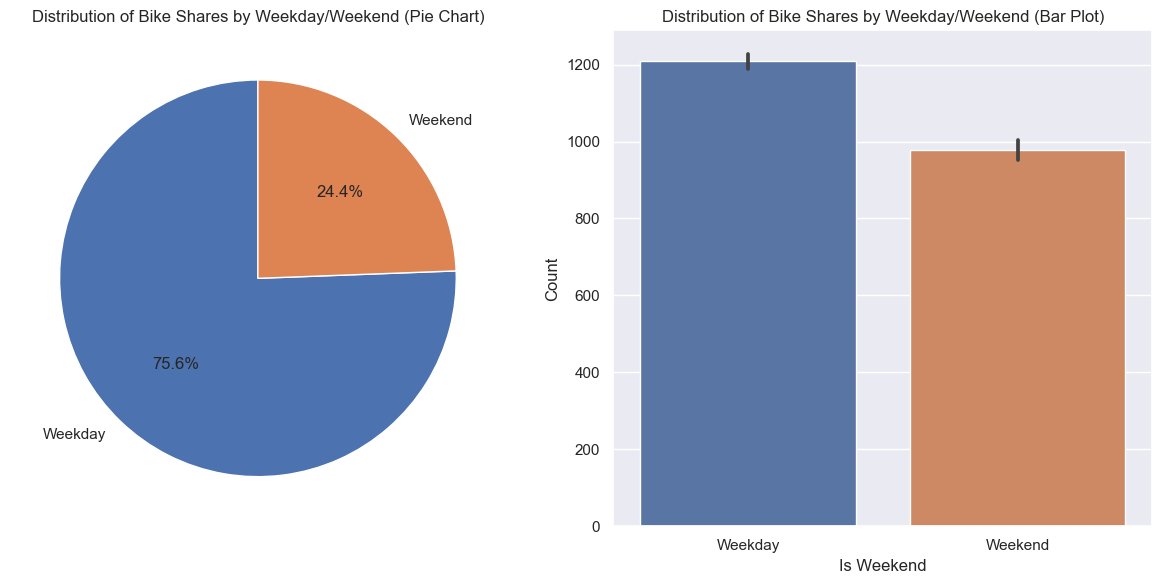

In [29]:
# Group the data by is_weekend
grouped = df_bike.groupby('is_weekend', as_index=False)['cnt'].sum()

# Define labels for pie chart
labels = ['Weekday', 'Weekend']

# Plot pie chart
plt.figure(figsize=(12, 6))

# Pie chart
plt.subplot(1, 2, 1)
plt.pie(grouped['cnt'], labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Bike Shares by Weekday/Weekend (Pie Chart)')

# Plot bar plot
plt.subplot(1, 2, 2)
sns.barplot(data=df_bike, x='is_weekend', y='cnt')
plt.title('Distribution of Bike Shares by Weekday/Weekend (Bar Plot)')
plt.xlabel('Is Weekend')
plt.ylabel('Count')
plt.xticks([0, 1], ['Weekday', 'Weekend'])

plt.tight_layout()
plt.show()

<div class="alert alert-warning alert-info">
<span style=" color:red">16. Plot the distribution of weather code by seasons
</span>

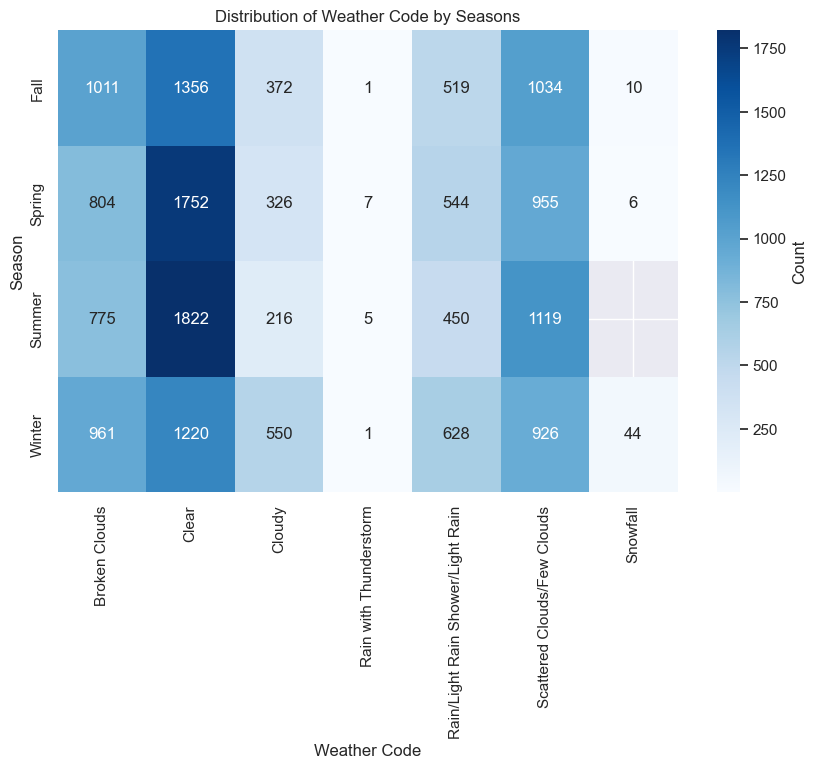

In [41]:
# Define the explicit labels for each weather code
weather_code_labels = {
    1: 'Clear',
    2: 'Scattered Clouds/Few Clouds',
    3: 'Broken Clouds',
    4: 'Cloudy',
    7: 'Rain/Light Rain Shower/Light Rain',
    10: 'Rain with Thunderstorm',
    26: 'Snowfall',
    94: 'Freezing Fog'
}

# Group the data by season and weather code, and calculate counts
grouped = df_bike.groupby(['season', 'weather_code'], as_index=False)['cnt'].count()

# Pivot the data for plotting and update column labels
pivot_table = grouped.pivot(index='season', columns='weather_code', values='cnt')
pivot_table.columns = [weather_code_labels.get(col, col) for col in pivot_table.columns]

# Reorder the columns based on the defined weather code labels
pivot_table = pivot_table[sorted(pivot_table.columns)]

# Plot the distribution of weather code by seasons
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt='g', cbar=True, cbar_kws={'label': 'Count'})
plt.title('Distribution of Weather Code by Seasons')
plt.xlabel('Weather Code')
plt.ylabel('Season')
plt.xticks(rotation=90)

plt.show()

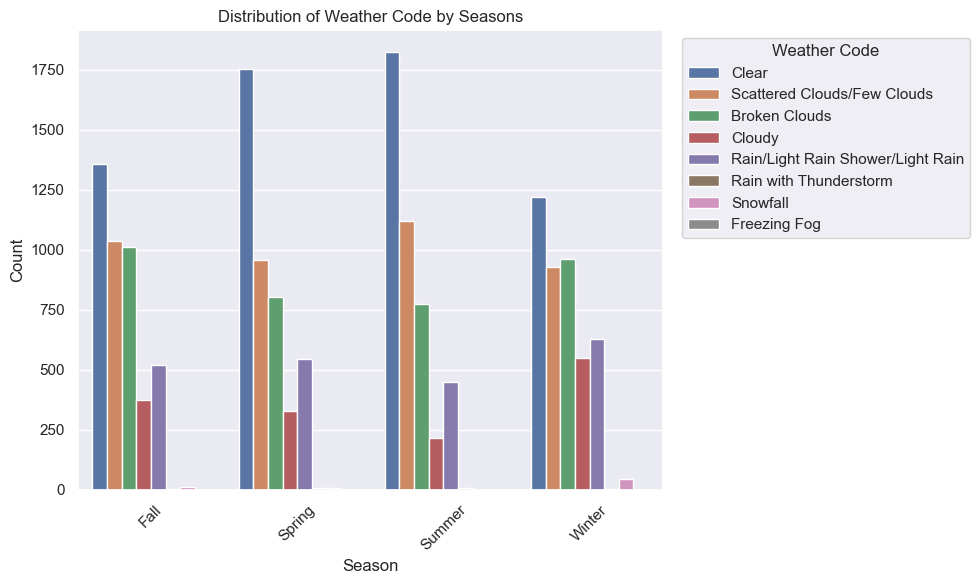

In [59]:

# Group the data by season and weather code, and calculate counts
grouped = df_bike.groupby(['season', 'weather_code'], as_index=False)['cnt'].count()

# Define the explicit labels for each weather code
weather_code_labels = {
    1: 'Clear',
    2: 'Scattered Clouds/Few Clouds',
    3: 'Broken Clouds',
    4: 'Cloudy',
    7: 'Rain/Light Rain Shower/Light Rain',
    10: 'Rain with Thunderstorm',
    26: 'Snowfall',
    94: 'Freezing Fog'
}

# Define the order of weather codes
weather_order = [1, 2, 3, 4, 7, 10, 26, 94]

# Create the barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=grouped, x='season', y='cnt', hue='weather_code', order=sorted(df_bike['season'].unique()), hue_order=weather_order)
plt.title('Distribution of Weather Code by Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Customize the legend labels and colors
legend_labels = [weather_code_labels[code] if code in weather_code_labels else '' for code in weather_order]
legend_handles, _ = ax.get_legend_handles_labels()

# Move the legend outside the plot
plt.legend(legend_handles, legend_labels, title='Weather Code', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

<div class="alert alert-info alert-info ">

# <span style=" color:red">Conclusions
    

    

</span>